# Test Pipeline

## Import Moduls & Globals

In [1]:
from utils.libs import *

In [2]:
packages_version_dict = \
{
    "keras": str(keras.__version__),
    "sklearn": str(sklearn.__version__),
    "tf": str(tf.__version__),
}

In [3]:
packages_version_df = pd.DataFrame(data = packages_version_dict.values(), index = packages_version_dict.keys(), columns = ['Version'])
print(packages_version_df)

        Version
keras     2.4.3
sklearn  0.23.1
tf        2.2.0


In [4]:
os.getcwd()
set_config(display='diagram')

SEED = 1234
RANDOM_STATE = 42

N_FOLDS = 10

N_COMPONENTS = 2

target_names = ['Occupancy', 'Non-Occupancy']

np.random.seed(seed = SEED)

### Fetch Train Data

In [5]:
dir_path = "C:\\Users\\Francesco\\Documents\\datasets\\occupancy_data"
file_name = "datatraining.txt"

file_path = os.path.join(dir_path, file_name)

print(file_path)

C:\Users\Francesco\Documents\datasets\occupancy_data\datatraining.txt


In [6]:
train_data = pd.read_csv(file_path)

In [7]:
train_data.describe(include="all")

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
unique,8143,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-02-09 05:26:59,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,NaN,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,NaN,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,NaN,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,NaN,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,NaN,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


### Fetch Test Data

In [9]:
dir_path = "C:\\Users\\Francesco\\Documents\\datasets\\occupancy_data"
file_name = "datatest.txt"

file_path_test_set = os.path.join(dir_path, file_name)

print(file_path)

C:\Users\Francesco\Documents\datasets\occupancy_data\datatraining.txt


In [10]:
test_data = pd.read_csv(file_path_test_set)

In [11]:
test_data.describe(include="all")

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
unique,2665,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-02-04 08:13:59,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,NaN,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,NaN,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,NaN,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,NaN,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,NaN,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


### Define Pipeline

In [13]:
X_train, y_train = train_data.iloc[:, 1:-1], train_data.iloc[:, -1].values
X_test, y_test = test_data.iloc[:, 1:-1], test_data.iloc[:, -1].values

X_train, y_train = shuffle(X_train, y_train, random_state=RANDOM_STATE)

In [14]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    # ('scaler', StandardScaler())
    ('scaler', Normalizer())
    
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
])

transformer = random_projection.SparseRandomProjection(n_components = 5, random_state = 0) # None
# transformer = PCA(n_components = 2)

rt = RandomTreesEmbedding(max_depth=3, n_estimators=10, random_state=0)

# clf = LogisticRegression(max_iter=1000, random_state = 0)
clf = RidgeClassifier(max_iter=1000, random_state = 0)

In [15]:
pipe = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('transformer', transformer),
        ('rt', rt),
        ('clf', clf),
    ]
)

In [16]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   Normalizer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000186D61BB808>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000186D61BB788>)])),
                ('transformer',
                 SparseRandomProjection(n_components=5, random_state=0)),
                ('rt',
                 RandomTreesEmbedding(max_depth=3, n_estimators=10,
                                      random_state=0)),
                ('clf', RidgeClassifier(max_iter=1000, random_state=0))])

In [17]:
clf_name = str(clf).split('(')[0]
trfm_name = str(rt).split('(')[0]

map_2_acronym = lambda xx: re.sub('[a-z]', '', str(xx[1]).split('(')[0])
pipe_elems = list(map(map_2_acronym, pipe.steps[:]))[1:]
                                  
label = ' + '.join([xx for xx in pipe_elems])
print(label)

SRP + RTE + RC


### Train & Evaluate Model

In [18]:
pipe.fit(X_train, y_train)
y_pred_rt = pipe.predict(X_test)
fpr_rt_clf, tpr_rt_clf, _ = roc_curve(y_test, y_pred_rt)

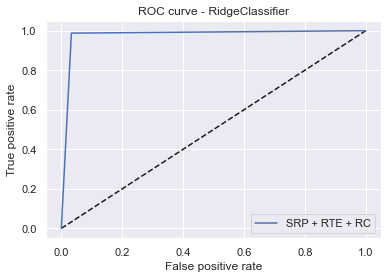

In [19]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_clf, tpr_rt_clf, label=label)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'ROC curve - {clf_name}')
plt.legend(loc='best')
plt.show()

In [20]:
results = pipe.score(X_test, y_test)
# print(f"Accuracy: {results:.4f}")
print(f"Accuracy(%): {results * 100:.2f}%")

Accuracy(%): 97.45%


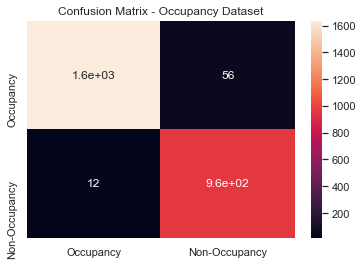

In [21]:
y_pred = pipe.predict(X_test)
# matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
show_cm(y_test, y_pred, target_names, n_classes = 2, title = 'Confusion Matrix - Occupancy Dataset')

In [22]:
pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.99      0.97      0.98      1693\n'
 '           1       0.94      0.99      0.97       972\n'
 '\n'
 '    accuracy                           0.97      2665\n'
 '   macro avg       0.97      0.98      0.97      2665\n'
 'weighted avg       0.98      0.97      0.97      2665\n')
